In [1]:
import pymolpro as pmp
import math 
import numpy as np


def orbitalsize(orbital):
    tmp=orbital.second_moment_eigenvalues
    tmp=tmp.tolist()
    tmp=[float(i) for i in tmp]
    tmp.append(math.sqrt(sum([orbital.local_second_moments[i][i] for i in range(3)])))
    return np.array(tmp)

def chkorbid(o1,o2):
    if o1.startswith('-'):
        chko1=o1[1:]
    else:
        chko1=o1
    if o2.startswith('-'):
        chko2=o2[1:]
    else:
        chko2=o2
    if chko1==chko2:
        return True
    else: 
        return False

In [2]:
geo_list=['He','Ne','Ar','Kr']
p_list=[]

In [3]:
for i in geo_list:
    p=pmp.Project(i)
    p.write_input(f"""
    geometry={{{i}}}
    basis, cc-pv5z;
    rhf;
    locali, pipek;
    CCSD;
    put,xml
    """
                  )
    p.run(wait=True)
    p_list.append(p)
    print(i, "done")

He done
Ne done
Ar done
Kr done


In [4]:
pair_list=[]
train_arr_list=[]
arr_list=[]

for p in p_list:
    orbital_dt={}
    dens_dt={}
    for orbital in p.orbitals():
        orbital_dt.update({orbital.ID:orbitalsize(orbital)})
        orbital_dt.update({f'-{orbital.ID}':orbitalsize(orbital)})
    for pair in p.xpath("//pair"):
        tmp=pmp.element_to_dict(pair)
        oid1,oid2=tmp['orbital1'],tmp['orbital2']
        if chkorbid(oid1,oid2)==True:
            tmp_arr=np.array(orbital_dt[oid1])
            train_arr_list.append(tmp_arr)
            pair_list.append(float(tmp['energy']))
                
    print(train_arr_list)
labels=np.array(pair_list)
features=np.stack(train_arr_list)


[array([0.39478046, 0.39478046, 0.39478046, 1.08827449]), array([0.39478046, 0.39478046, 0.39478046, 1.08827449])]
[array([0.39478046, 0.39478046, 0.39478046, 1.08827449]), array([0.39478046, 0.39478046, 0.39478046, 1.08827449]), array([0.32231682, 0.32231682, 0.32231682, 0.98333639]), array([0.32231682, 0.32231682, 0.32231682, 0.98333639]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857])]
[array([0.39478046, 0.39478046, 0.39478046, 1.08827449]), array([0.39478046, 0.39478046, 0.39478046, 1.08827449]), array([0.32231682, 0.32231682, 0.32231682, 0.98333639]), array([0.32231682, 0.32231682, 0.32231682, 0.98333639]), array([0.24551887, 0.24551887, 0.73655661, 1.10796857]), array([0.24551887, 0.2455188

In [17]:
print(features,labels)

[[0.39478046 0.39478046 0.39478046 1.08827449]
 [0.39478046 0.39478046 0.39478046 1.08827449]
 [0.32231682 0.32231682 0.32231682 0.98333639]
 [0.32231682 0.32231682 0.32231682 0.98333639]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.24551887 0.24551887 0.73655661 1.10796857]
 [0.78344752 0.78344752 0.78344752 1.5330827 ]
 [0.78344752 0.78344752 0.78344752 1.5330827 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [0.661955   0.661955   1.98586499 1.8192787 ]
 [1.01344835 1.01344835 1.01344835 1.74365852]
 [1.01344835 1.01344835 1.01344835 1.74365852]
 [0.89091484 0.89091484 2.67274451 2.11058622]
 [0.89091484 

In [5]:
features.shape

(26, 4)

2024-08-12 16:43:53.404157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 16:43:53.420726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 16:43:53.426018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 16:43:53.437877: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 16:43:54.171266: W tensorflow/compiler/tf2

Epoch 1/100


2024-08-12 16:43:54.832112: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-12 16:43:54.832137: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: lskdfn
2024-08-12 16:43:54.832142: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: lskdfn
2024-08-12 16:43:54.832217: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 555.42.2
2024-08-12 16:43:54.832235: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 555.42.2
2024-08-12 16:43:54.832239: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 555.42.2


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 0.0096 - mae: 0.1112 - mape: 1427.7686 
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.0042 - mae: 0.0797 - mape: 878.1455
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.0022 - mae: 0.0556 - mape: 679.6917
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 6.7908e-04 - mae: 0.0300 - mape: 299.2845
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 5.2281e-04 - mae: 0.0270 - mape: 258.3725
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 1.7527e-04 - mae: 0.0172 - mape: 146.7308
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 5.3950e-05 - mae: 0.0090 - mape: 82.6737
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 3.0490e-05 - mae: 0.0057 - mape: 70.8882 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 2.5027e-05 - mae: 0.0064 - mape: 73.8886
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 2.0473e-05 - mae: 0.0056 - mape: 61

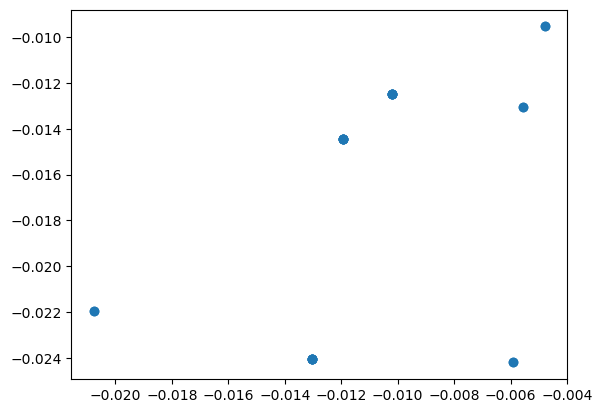

In [5]:
import keras
import tensorflow as tf

dataset=tf.data.Dataset.from_tensor_slices((features,labels))
dataset = dataset.shuffle(buffer_size=len(pair_list)//4).batch(batch_size=1)


model=keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='huber',
             metrics=['mae','mape'])
model.fit(dataset,epochs=100)

predictions=model.predict(features)

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter(labels,predictions)


In [7]:
def buildmodel(act,loss):
    model=keras.Sequential([
        keras.layers.Input(shape=(4,)),
        keras.layers.Dense(64,activation=act),
        keras.layers.Dense(1,)
    ])
    model.compile(
        'Adam',
        loss=loss)
    return model

act_funcs=['relu','selu','tanh','sigmoid','gelu']
loss=['mse','mae','mape','huber']

result_dt=[]

q=0
for i in act_funcs:
    for j in loss:
        model=buildmodel(i,j)
        model.fit(dataset,epochs=25)
        tmp=np.array(model.predict(features))
        result_dt.append({'params':{i,j},'predictions':tmp})


Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 0.1601 
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0092  
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0122
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.0052
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0038
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0021
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.0012
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 7.3231e-04
Epoch 9/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 3.3061e-04
Epoch 10/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 2.4100e-04
Epoch 11/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 1.1526e-04
Epoch 12/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1.1035e-04
Epoch 13/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 9.3005e-05
Epoch 14/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 8.6521e-05
Epoch 15/25
26/26 ━━━━━━━━

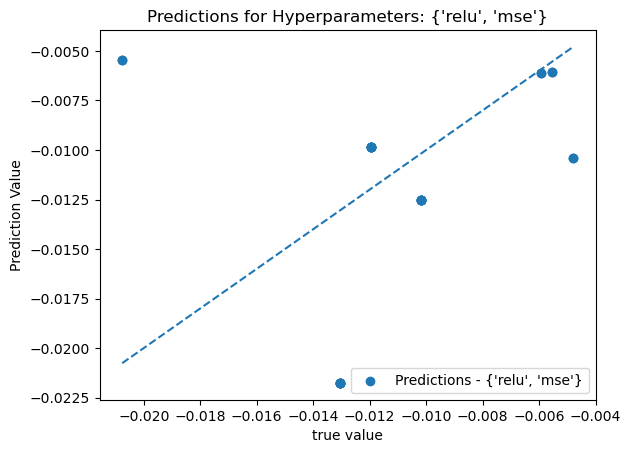

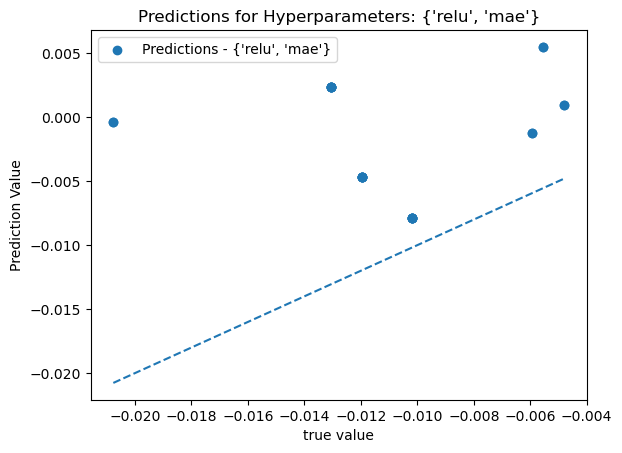

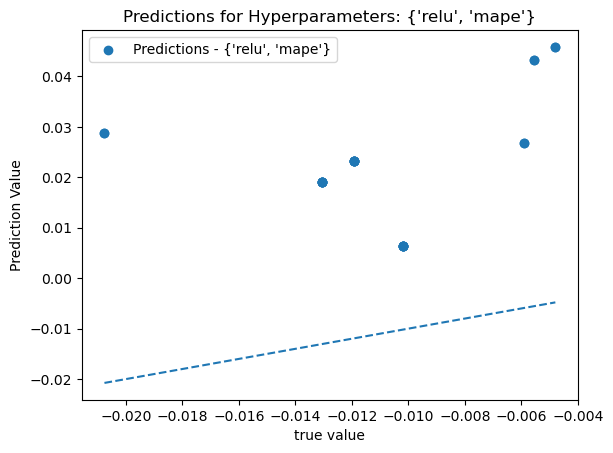

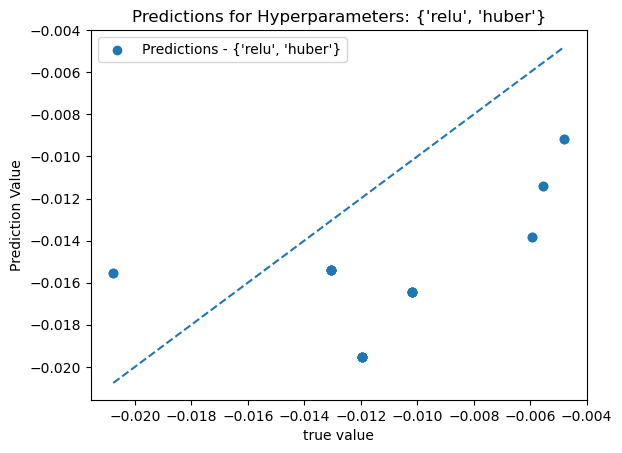

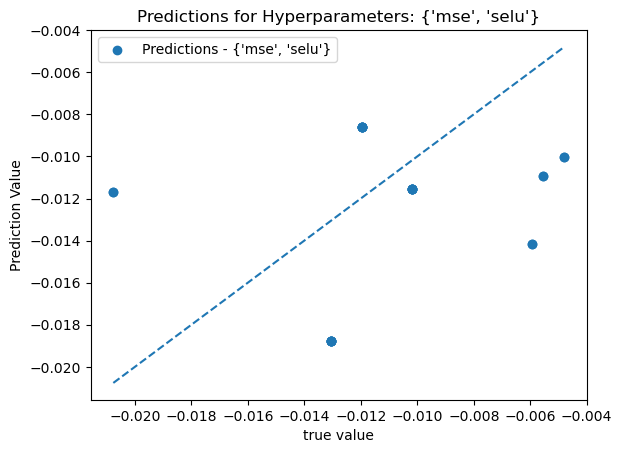

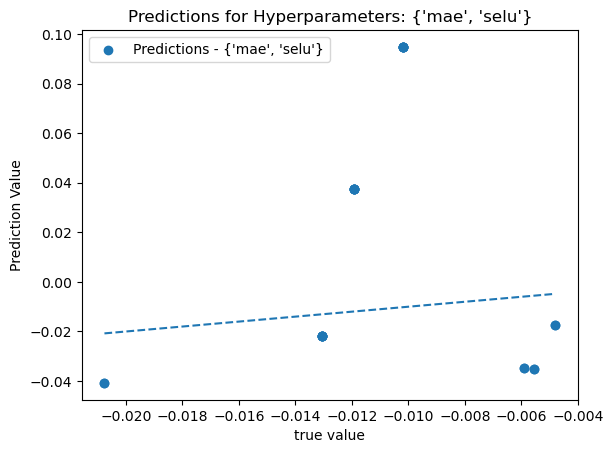

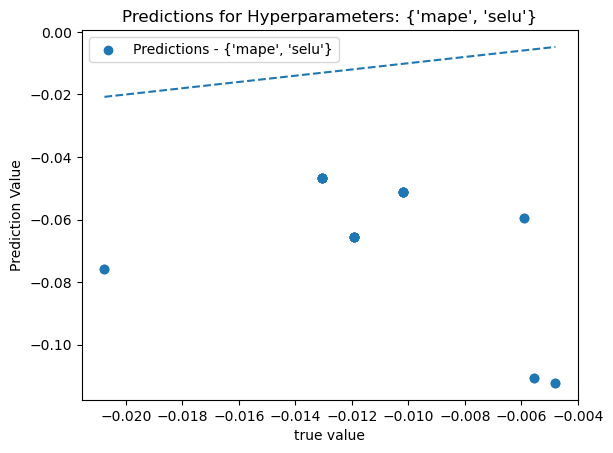

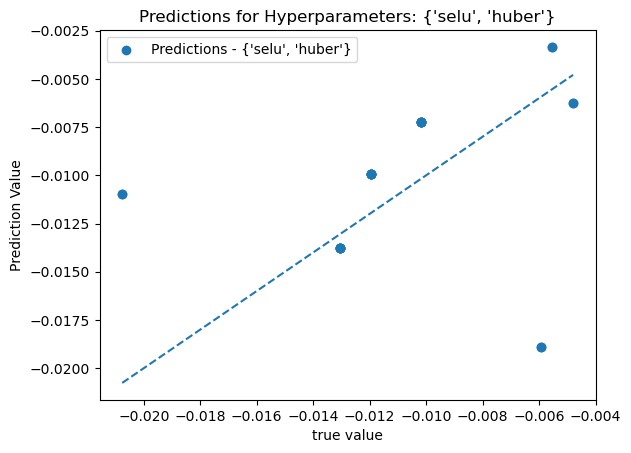

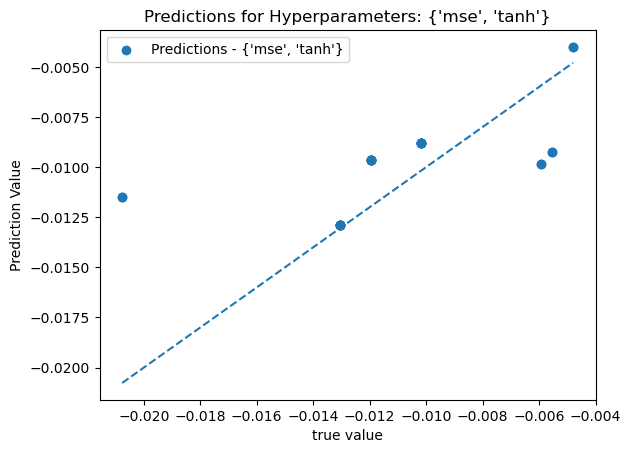

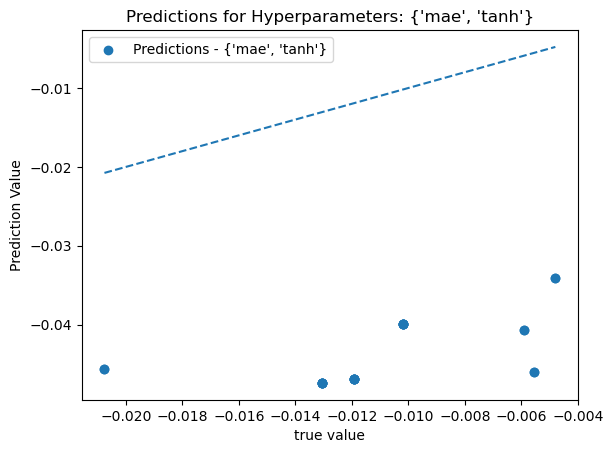

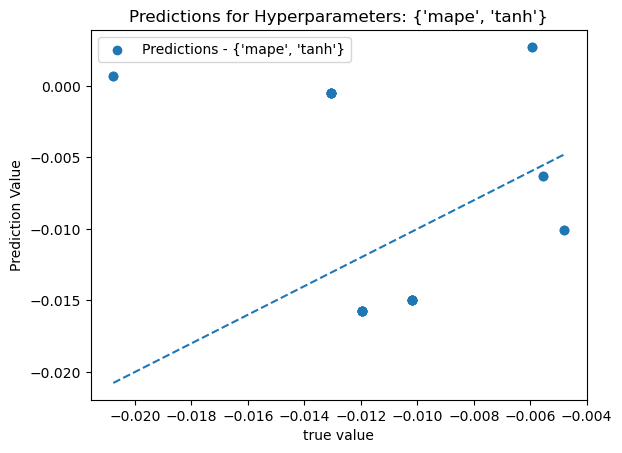

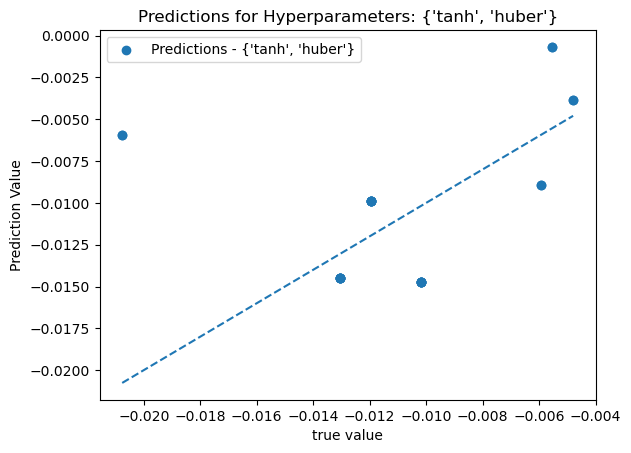

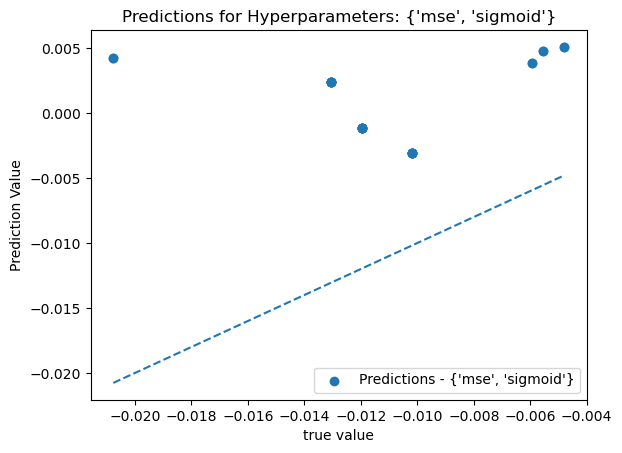

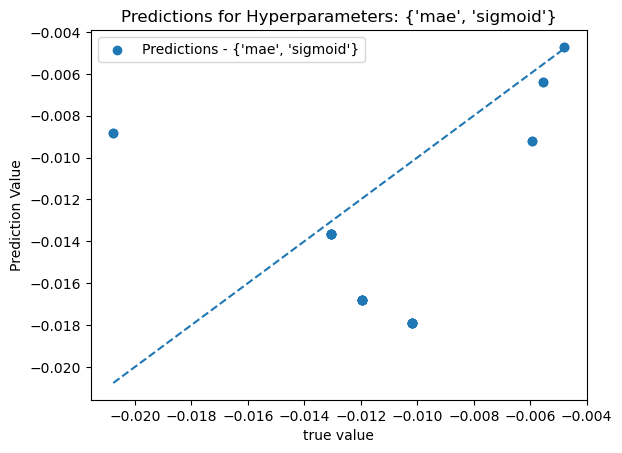

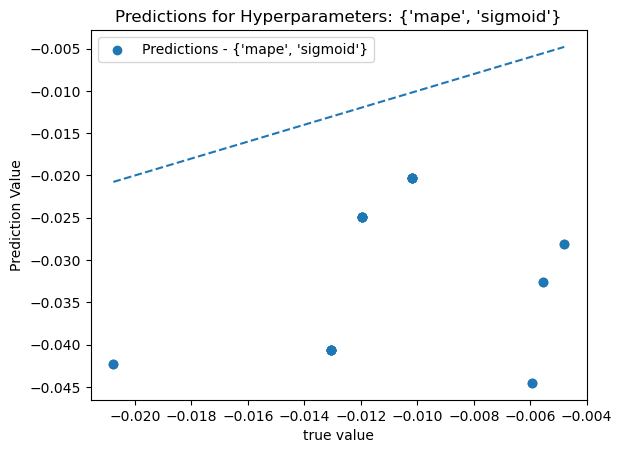

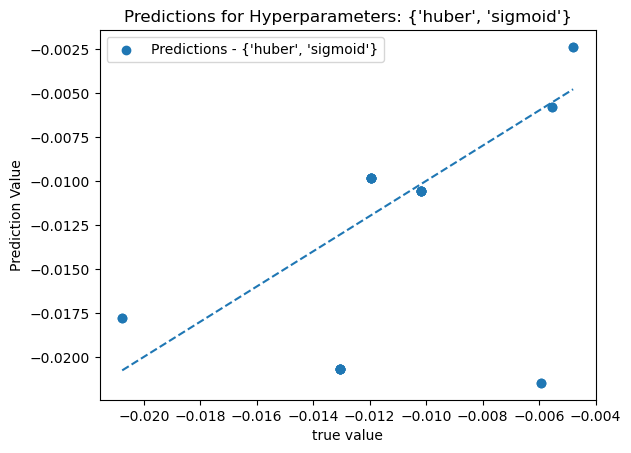

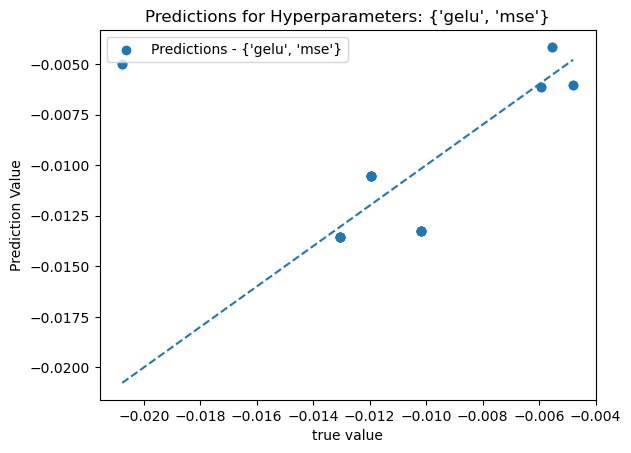

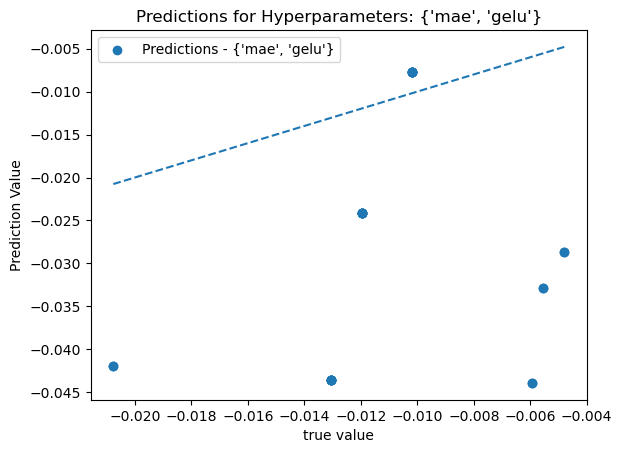

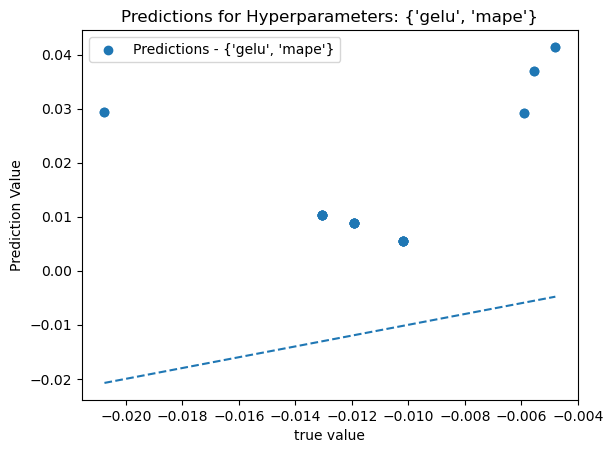

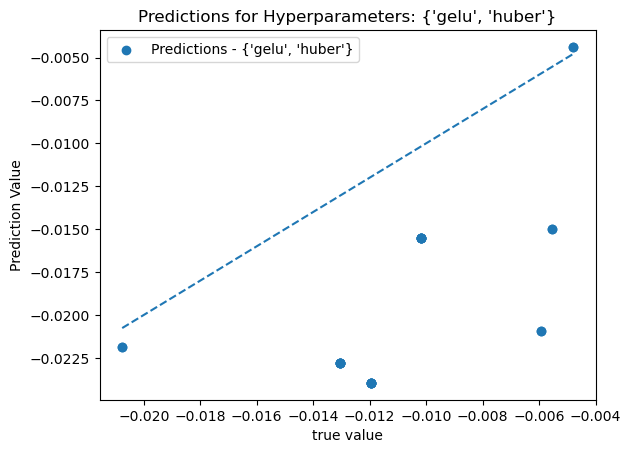

In [8]:
for i,results in enumerate(result_dt):
    plt.figure(i)
    plt.scatter(labels, results['predictions'], label=f"Predictions - {results['params']}")
    plt.title(f"Predictions for Hyperparameters: {results['params']}")
    plt.plot((min(labels),max(labels)),(min(labels),max(labels)),linestyle='--')
    plt.xlabel("true value")
    plt.ylabel("Prediction Value")
    plt.legend()
    plt.show()
    

In [9]:
from sklearn.metrics import mean_squared_error

def buildmodel(units,act):
    model=keras.Sequential([
        keras.layers.Input(shape=(4,)),
        keras.layers.Dense(units,activation='softmax'),
        keras.layers.Dense(1,)
    ])
    model.compile(
        'Adam',
        loss='mse')
    return model

actis=['softmax']

result_dt=[]
mse_sig_list=[]
mse_tanh_list=[]

q=0
for i in range(32,640,32):
    model=buildmodel(i,j)
    model.fit(dataset,epochs=30)
    tmp=np.array(model.predict(features))
    result_dt.append({'params':{i,j},'predictions':tmp})
    if j=='sigmoid':
        mse_sig_list.append({'units':i,'mse':mean_squared_error(tmp,labels)})
    else:
        mse_tanh_list.append({'units':i,'mse':mean_squared_error(tmp,labels)})
    print(q)
    q+=1
    

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - loss: 0.1020 
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0032
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4.1620e-04
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 7.0835e-05
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 6.7740e-05
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 4.5044e-05
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 3.8002e-05
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 4.9034e-05
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 3.9742e-05
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 3.6930e-05
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 3.7608e-05
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 3.3351e-05
Epoch 13/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 3.4295e-05
Epoch 14/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 3.4779e-05
Epoch 15

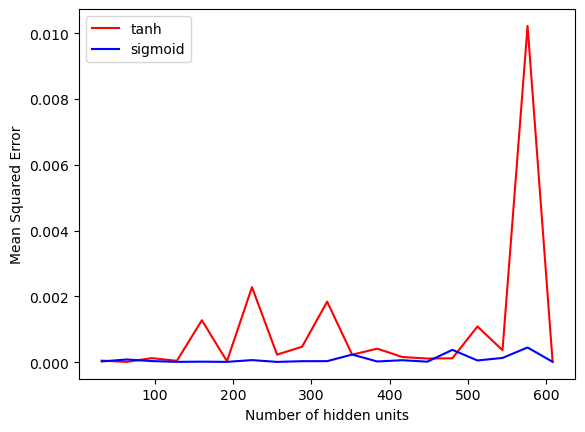

In [10]:
units=[entry['units'] for entry in mse_tanh_list]
tmse=tunits=[entry['mse'] for entry in mse_tanh_list]

smse=tunits=[entry['mse'] for entry in mse_sig_list]

plt.plot(units,tmse, c='red', label='tanh')
plt.plot(units,smse, c='blue', label='sigmoid')
plt.xlabel("Number of hidden units")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - loss: 0.0151 
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 4.9064e-04
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1.3850e-04
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 1.8899e-04
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 1.4965e-04
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1.5835e-04
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 6.9526e-05
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 6.2818e-05
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 1.2977e-04
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 2.8847e-05
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 2.6143e-05
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 3.9271e-05
Epoch 13/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 2.3128e-05
Epoch 14/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 1.5649e-05
Epoc

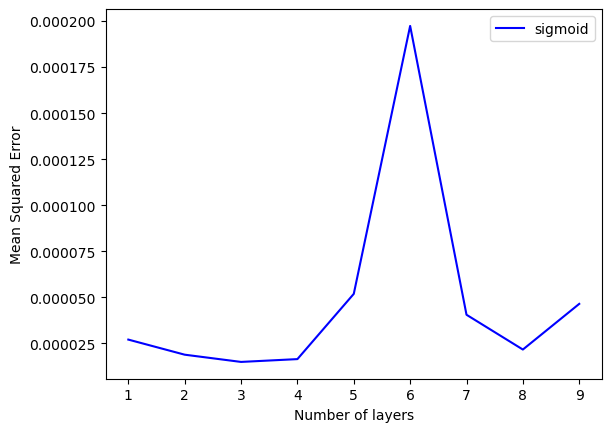

In [11]:
def buildmodel(depth):
    model=keras.Sequential()
    model.add(keras.layers.Input(shape=(4,)))
    for i in range(depth):
        model.add(keras.layers.Dense(100 ,activation='sigmoid'))
    model.add(keras.layers.Dense(1))
    model.compile('Adam',
        loss='huber')
    return model
depth_list=[i for i in range(1,10)]
lmse=[]
for i in depth_list:
    model=buildmodel(i)
    model.fit(dataset,epochs=30)
    tmp=np.array(model.predict(features))
    lmse.append(mean_squared_error(tmp,pair_list))

plt.plot(depth_list,lmse, c='blue', label='sigmoid')
plt.xlabel("Number of layers")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()
              
    

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - loss: 0.0961
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0059
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 3.0340e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 1.6105e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 1.0304e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 4.3165e-05
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 6.7787e-05
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 5.2021e-05
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 5.2990e-05
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 7.0504e-05
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 6.2020e-05
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 3.1341e-05
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 3.0572e-05
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 5.8728e-05
Epoch 15/

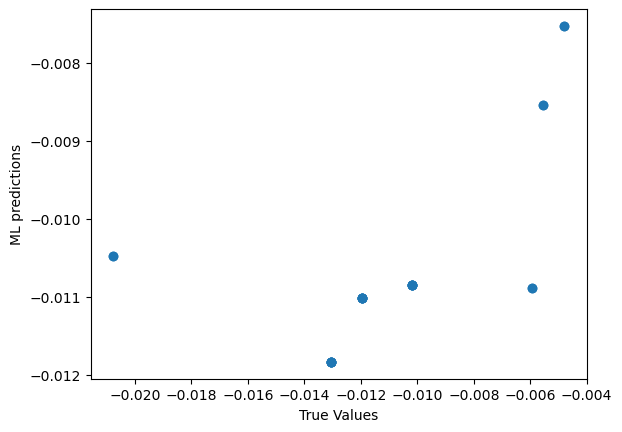

In [15]:
model=keras.Sequential()
model.add(keras.layers.Input(shape=(4,)))
for i in range(3):
    model.add(keras.layers.Dense(100, activation='sigmoid'))

model.add(keras.layers.Dense(1))

model.compile('adam','mse')
model.fit(dataset, epochs=50)
tmp=model.predict(features)
plt.scatter(labels,tmp)
plt.xlabel('True Values')
plt.ylabel('ML predictions')
plt.show()

In [13]:
print(test_arr_list)

NameError: name 'test_arr_list' is not defined

In [ ]:
import tensorflow as tf
import keras


def build_nn1(input_shape):
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(5, activation='relu')
    ])
    return model


def build_nn2(combined_input_shape):
    model = keras.Sequential([
        keras.layers.Input(shape=combined_input_shape),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1) 
    ])
    return model


input_shape_nn1 = (64,)
input_shape_nn2 = (6,)
nn1 = build_nn1(input_shape_nn1)
nn2 = build_nn2(input_shape_nn2)


optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.losses.MeanSquaredError()



for epoch in range(100):
    with tf.GradientTape() as tape:
    
        intermediate_output = nn1(features)

        combined_input = tf.concat([intermediate_output, arr_list], axis=-1)

        output = nn2(combined_input)
        
        loss = tf.loss_fn(labels, output)
    

    gradients = tape.gradient(loss, nn1.trainable_variables + nn2.trainable_variables)
    
    keras.optimizer.apply_gradients(zip(gradients, nn1.trainable_variables + nn2.trainable_variables))
    
    print(f'Epoch {epoch+1}, Loss: {loss.numpy()}')

print("Training complete.")
